# LetsGrowMore Data Science Internship (VIP)

Name : Harish Seenivasan

Title : Iris Flowers Classification ML Project

Batch : May

# Step 1 : Data Collection

Importing The Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading The Dataset

In [2]:
df = pd.read_csv("iris.data")
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

Assigning The Column Names

In [4]:
columns = ['sepal_length' , 'sepal_width' , 'petal_length' , 'petal_width' , 'species']
df.columns = columns
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# Step 2 : Understanding the data

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.shape

(149, 5)

# Step 3 : Checking the null values in the dataset

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Step 4 : Data Visualization

Boxplot

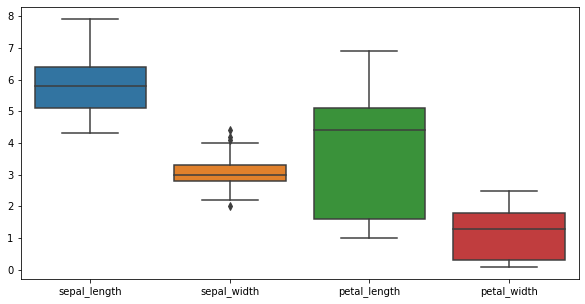

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df)
plt.show()

Histogram

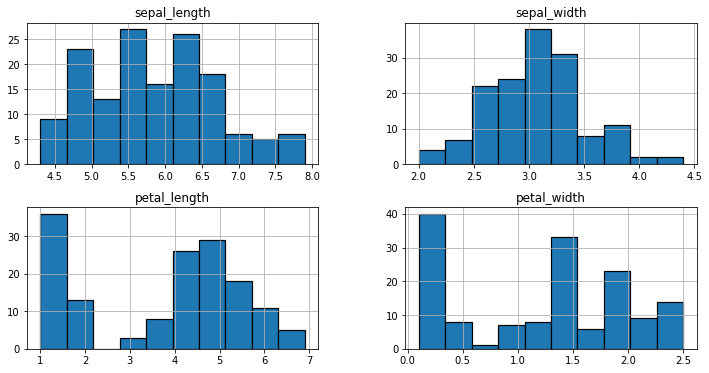

In [12]:
df.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

HeatMap

In [13]:
cor = df.corr()

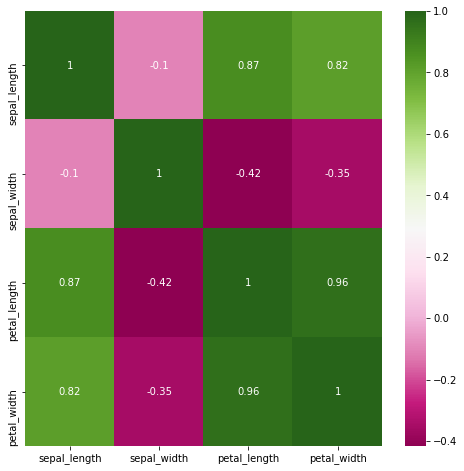

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr() , annot = True , cmap = 'PiYG')
plt.show()

Pairplot

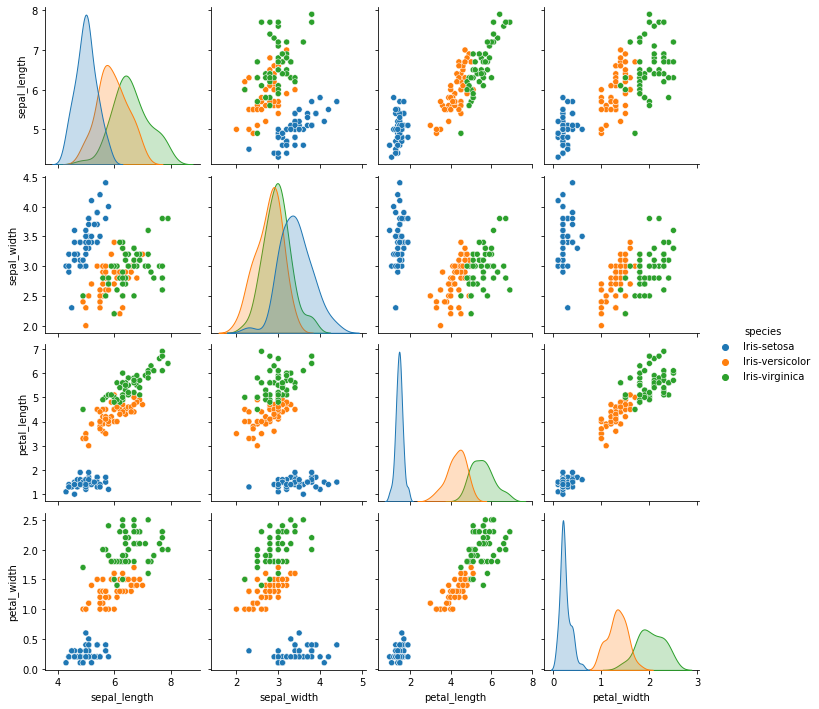

In [17]:
sns.pairplot(df , hue = 'species')

In [18]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Step 5 : Data Transformation

We know that Machine Learning does not takes the input as categorical values it takes in the form of numerical values so
we need to convert the categorical values to numerical values using LabelEncoder.

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [20]:
X = df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [23]:
Y = df.iloc[:,-1:]
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


# Step 6 : Model Building

Scikit-learn’s train_test_split function allow us to shuffle and split the dataset in a single line. The function takes a 
sequence of arrays (the arrays must be of the same length) and options to specify how to split the arrays. By default, the 
function extracts 75% of the rows in the arrays as the training set while the remaining 25% of rows is declared as the test
set.

Deciding how much data you want to put into the training and the test set respectively is somewhat arbitrary, but using a 
test set containing 25% of the data is a good rule of thumb.

The function also allow us to control the shuffling applied to the data before applying the split with the option 
random_state, this ensures reproducible results.

X is having all the independent variables and Y is having dependent variable.

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [25]:
X_train.shape

(119, 4)

In [26]:
Y_train.shape

(119, 1)

Here we are using svc model to predict our data after that fitting/training the model on X_train and Y_train using .fit()
method.

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train , Y_train)

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

Then we are predicting on X_test using .predict() method. And checking accuracy how the model is accurate or how it is 
properly worikng on data.

In [28]:
from sklearn.metrics import accuracy_score
prediction = svm.predict(X_test)
print("Accuracy:", accuracy_score(Y_test , prediction))

Accuracy: 0.9666666666666667


In [29]:
from sklearn.metrics import classification_report
print("Report:", classification_report(Y_test, prediction))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



For this model, the accuracy on the test set is 0.96, which means the model made the right prediction for 96% of the irises
in the given dataset. We can expect the model to be correct 96% of the time for predicting the species of new irises.